# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [25]:
df = pd.read_csv(r"E:\Data Science\1\hearing_test.csv")

In [26]:
df.head(6)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
5,58.0,23.0,0


In [27]:
df.shape

(5000, 3)

In [28]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

# EDA (Exploratory Data Analysis)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [30]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [31]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [32]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [33]:
for i in df.columns:
    fig = px.histogram(df,x=i,color=i)
    fig.show()

In [34]:
for i in df.columns:
    fig = px.scatter(df,x=i,y="test_result",color="physical_score")
    fig.show()

In [35]:
px.imshow(df.corr())

# Split X and Y

In [36]:
x = df.drop('test_result', axis=1)
y = df['test_result']

# Train and Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Scalling

In [38]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scaled_x_train = scalar.fit_transform(x_train)
scaled_x_test = scalar.transform(x_test)

# Model Building

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [40]:
log_model.coef_

array([[-0.91653034,  3.4506941 ]])

# Model Performance

In [41]:
y_pred = log_model.predict(scaled_x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[515,  82],
       [ 37, 866]], dtype=int64)

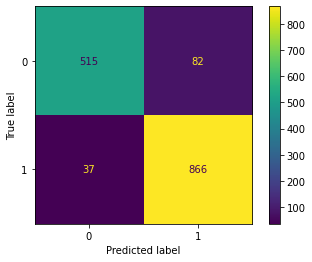

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



# AUC(Area Under the Curve)

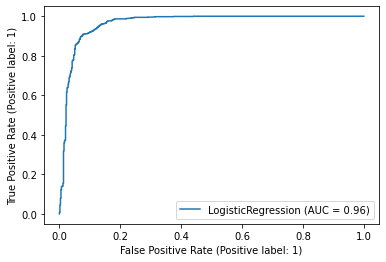

In [46]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,scaled_x_test,y_test)